In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import pickle

module_url = "https://tfhub.dev/google/universal-sentence-encoder/2" #@param ["https://tfhub.dev/google/universal-sentence-encoder/2", "https://tfhub.dev/google/universal-sentence-encoder-large/3"]
embed = hub.Module(module_url)

In [12]:
test_image_caption = pickle.load(open('test_image_caption.pkl', 'rb'))

captions = list(map(lambda x: x['caption'], test_image_caption))

with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    message_embeddings = session.run(embed(captions))
    print(message_embeddings.shape)
    new_test_image_vector = []
    for i, v in enumerate(test_image_caption):
        obj = {}
        obj['name'] = v['name']
        obj['caption'] = v['caption']
        obj['vector'] = message_embeddings[i]
        new_test_image_vector.append(obj)

    with open('test_image_vector.pkl', 'wb') as f:
        pickle.dump(new_test_image_vector, f)

(2000, 512)


In [47]:
from scipy.spatial.distance import cdist
import nltk

test_vectors = pickle.load(open('test_image_vector.pkl', 'rb'))
vectors = list(map(lambda x: x['vector'], test_vectors))

with open('./all/data/descriptions_test/0.txt') as f:
    content = f.readlines()
    content = [x.strip() for x in content] 
    all_nouns = set()
    for l in content:
        nouns = [word for (word, pos) in nltk.pos_tag(nltk.word_tokenize(l)) if pos[0] == 'N']
        for n in nouns:
            all_nouns.add(n)

print(all_nouns)

with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    message_embedding = session.run(embed([content[-1]]))
    dist = cdist(message_embedding, vectors, 'cosine')
    print(dist.shape)

{'walking', 'woman', 'street', 'talks', 'sides', 'phone', 'planters', 'building', 'watch', 'blue', 'doorway', 'entrance', 'front', 'sidewalk', 'cell'}
(1, 2000)


['541.jpg', '1131.jpg', '487.jpg', '426.jpg', '333.jpg', '235.jpg', '1053.jpg', '570.jpg', '813.jpg', '156.jpg', '1286.jpg', '1047.jpg', '742.jpg', '698.jpg', '561.jpg', '1772.jpg', '1836.jpg', '647.jpg', '1077.jpg', '723.jpg']


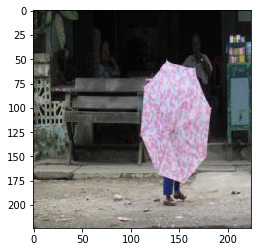

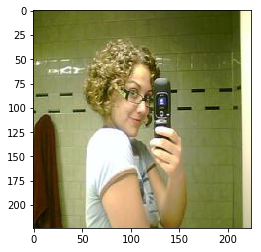

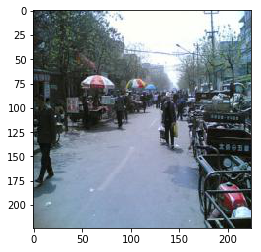

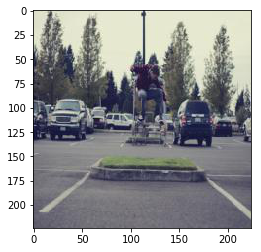

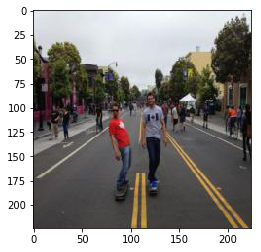

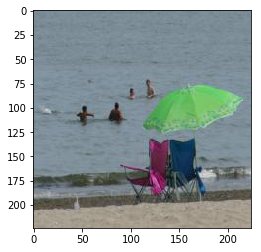

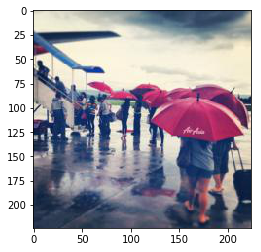

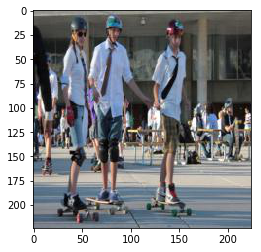

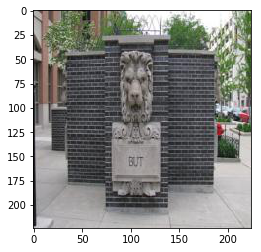

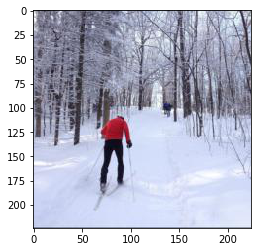

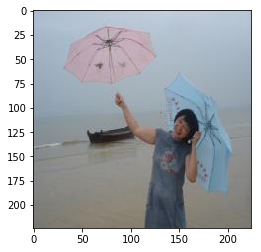

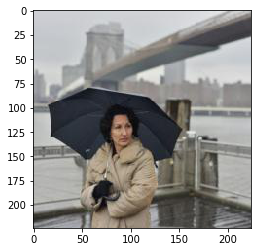

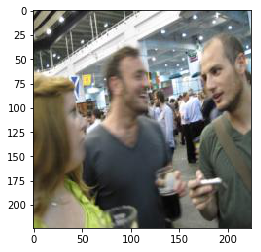

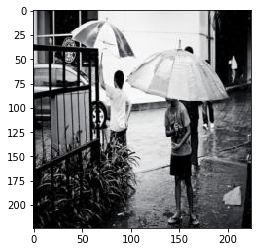

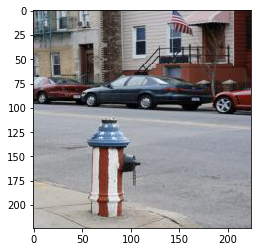

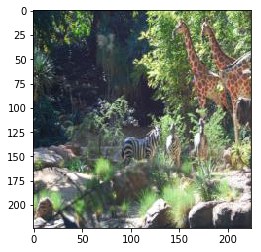

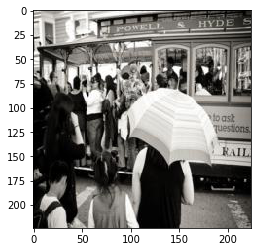

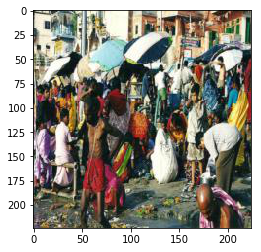

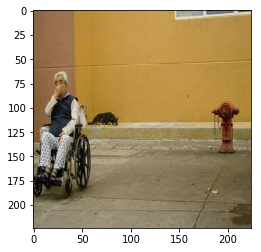

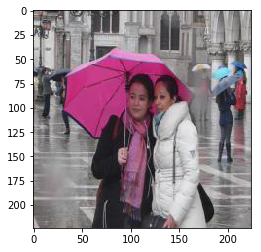

In [48]:
import numpy as np
sorted_id = np.argsort(dist)[:20][0]
top_choices =  list(map(lambda x: test_vectors[x]['name'], sorted_id[:20]))
print(top_choices)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

"""
# get the nouns of the sentence[five descriptions].
# the images with the correct tag will form first group. others forms the other group. 
"""

test_images_base = "./all/data/images_test/"
for f in top_choices:
    f_path = test_images_base + f
    img = mpimg.imread(f_path)
    plt.figure()
    plt.imshow(img)
    plt.show()